# 02 - Multiplicative interactions & Ratio features - comparison

*info for myself*
These tools capture relationships between variables  
They are particularly useful for identifying complex interactions and proportional relationships that aren't explicitly represented in the original dataset.

When to use?  
Multiplicative Interactions:  
When you suspect that two features interact non-linearly to influence the target.  

Ratio Features:  
When you want to understand how one feature depends on another or normalize a feature by its scale.

By comparing the performance of multiplicative interactions and ratio features, you can identify which feature engineering strategy better captures meaningful patterns in your dataset. Some relationships might depend on interactions, while others are driven by proportions.

In [1]:
# import libraries as usual
import pandas as pd
import numpy as np
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("bank_numeric.csv")

# Ensure the target column is correctly defined
target_column = "deposit"
features = df.drop(columns=[target_column])
target = df[target_column]

In [3]:
# Standardize features to handle scale differences
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)


In [4]:
# Generate Multiplicative Interaction Features
interaction_features = pd.DataFrame()
for col1, col2 in itertools.combinations(features_scaled.columns, 2):
    interaction_features[f"{col1}*{col2}"] = features_scaled[col1] * features_scaled[col2]


C:\Users\e1003118\AppData\Local\Temp\ipykernel_8456\776957256.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_features[f"{col1}*{col2}"] = features_scaled[col1] * features_scaled[col2]
C:\Users\e1003118\AppData\Local\Temp\ipykernel_8456\776957256.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_features[f"{col1}*{col2}"] = features_scaled[col1] * features_scaled[col2]
C:\Users\e1003118\AppData\Local\Temp\ipykernel_8456\776957256.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usu

In [5]:
# Generate Ratio Features
ratio_features = pd.DataFrame()
for col1, col2 in itertools.combinations(features_scaled.columns, 2):
    ratio_features[f"{col1}/{col2}"] = np.where(features_scaled[col2] != 0, features_scaled[col1] / features_scaled[col2], 0)


C:\Users\e1003118\AppData\Local\Temp\ipykernel_8456\4001564265.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ratio_features[f"{col1}/{col2}"] = np.where(features_scaled[col2] != 0, features_scaled[col1] / features_scaled[col2], 0)
C:\Users\e1003118\AppData\Local\Temp\ipykernel_8456\4001564265.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ratio_features[f"{col1}/{col2}"] = np.where(features_scaled[col2] != 0, features_scaled[col1] / features_scaled[col2], 0)
C:\Users\e1003118\AppData\Local\Temp\ipykernel_8456\40015642

In [6]:
# Combine original features, interaction features, and ratio features
all_features = pd.concat([features_scaled, interaction_features, ratio_features], axis=1)


In [7]:
# Feature Selection using SelectKBest (ANOVA F-statistic) for comparison
select_kbest = SelectKBest(score_func=f_classif, k=10)
select_kbest.fit(all_features, target)


SelectKBest()

In [8]:
# Get top features
selected_features = pd.DataFrame({
    "Feature": all_features.columns[select_kbest.get_support()],
    "Score": select_kbest.scores_[select_kbest.get_support()]
}).sort_values(by="Score", ascending=False)


In [9]:
# Separate top features by type
selected_interaction_features = selected_features[selected_features['Feature'].str.contains(r'\*')]
selected_ratio_features = selected_features[selected_features['Feature'].str.contains(r'/')]


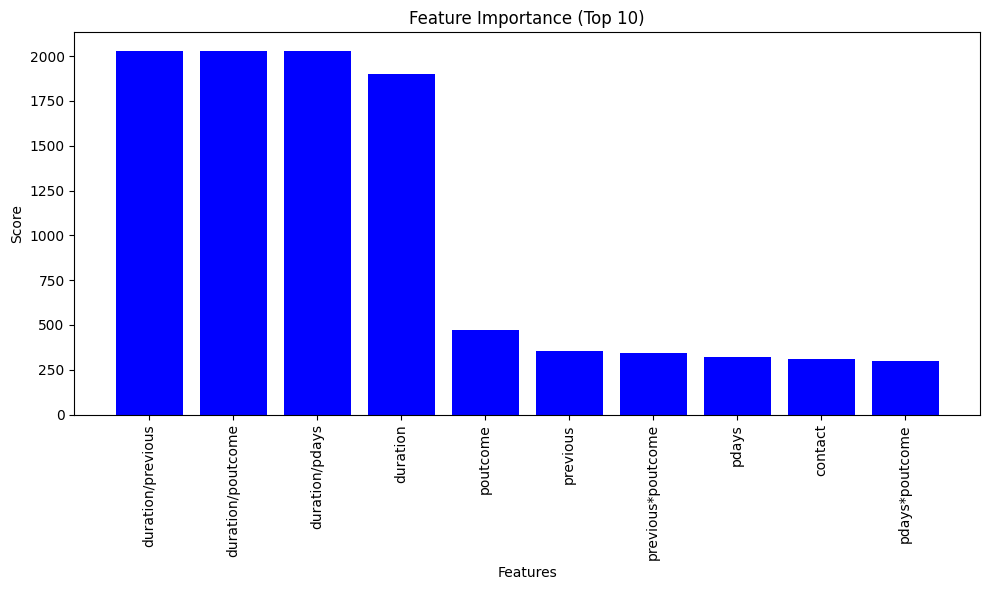

In [ ]:
# Visualize Feature Scores
plt.figure(figsize=(10, 6))
plt.bar(selected_features["Feature"], selected_features["Score"], color='blue')
plt.xticks(rotation=90)
plt.title("Feature Importance (Top 10)")
plt.xlabel("Features")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

# we can see that the previour result
# and dureation have the highest importance
# on the target variable
# and we had the same insights from the previous analysis

# there is also  the relative impact of duration to poutcome
# longer communication --> more chances to get a positive result

# we can see that the way of contact has almost no impact at all

# all these insights are the same as it was in the previous notebooks

In [ ]:
# Save results
selected_features.to_csv("top_features_comparison.csv", index=False)

# Display Results
print("Top 10 Features Overall:")
print(selected_features)
print("\nTop Multiplicative Interaction Features:")
print(selected_interaction_features)
print("\nTop Ratio Features:")
print(selected_ratio_features)

# we can see here some non-linear relationships between features
# thanks to Multiplicative 
# for example, pdays * poutcome (score: 301.12)
# This interaction indicates how these 2 variables 
# jointly influence the outcome

# Top Ratio Features:
# we can see that duration is in every pair
# it shows its importance

Top 10 Features Overall:
             Feature        Score
8  duration/previous  2030.734110
9  duration/poutcome  2026.997205
7     duration/pdays  2026.401949
1           duration  1902.347534
4           poutcome   472.158570
3           previous   357.502098
6  previous*poutcome   341.827925
2              pdays   319.856760
0            contact   312.420042
5     pdays*poutcome   301.123064

Top Multiplicative Interaction Features:
             Feature       Score
6  previous*poutcome  341.827925
5     pdays*poutcome  301.123064

Top Ratio Features:
             Feature        Score
8  duration/previous  2030.734110
9  duration/poutcome  2026.997205
7     duration/pdays  2026.401949
